In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes, svm

In [5]:
train_data = pd.read_csv("train_int.csv")
train_data.drop(columns=['id'], inplace=True)
test_data = pd.read_csv("test_int.csv")

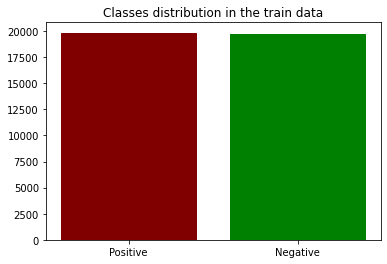

In [6]:
cl = ['Positive', 'Negative']
positive = train_data[train_data.sentiment == 1].sentiment.sum()
negative = train_data[train_data.sentiment == 0].sentiment.count()
counts = [positive, negative]
barlist = plt.bar(cl, counts)
barlist[0].set_color('#800000')
barlist[1].set_color('g')
plt.title('Classes distribution in the train data', fontsize=12)
plt.show()

In [7]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;#]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z +_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    """
        text: a string
        returns: modified initial string
    """
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(" ", text)
    text = BAD_SYMBOLS_RE.sub("", text)
    text = text.split()
    text = " ".join([word for word in text if not word in STOPWORDS])
    return text

In [8]:
train_data['review'] = train_data['review'].apply(text_prepare)
test_data['review'] = test_data['review'].apply(text_prepare)

In [9]:
train_data['review_lenght'] = np.array(list(map(len, train_data.review)))
median = train_data['review_lenght'].median()
mean = train_data['review_lenght'].mean()
mode = train_data['review_lenght'].mode()[0]

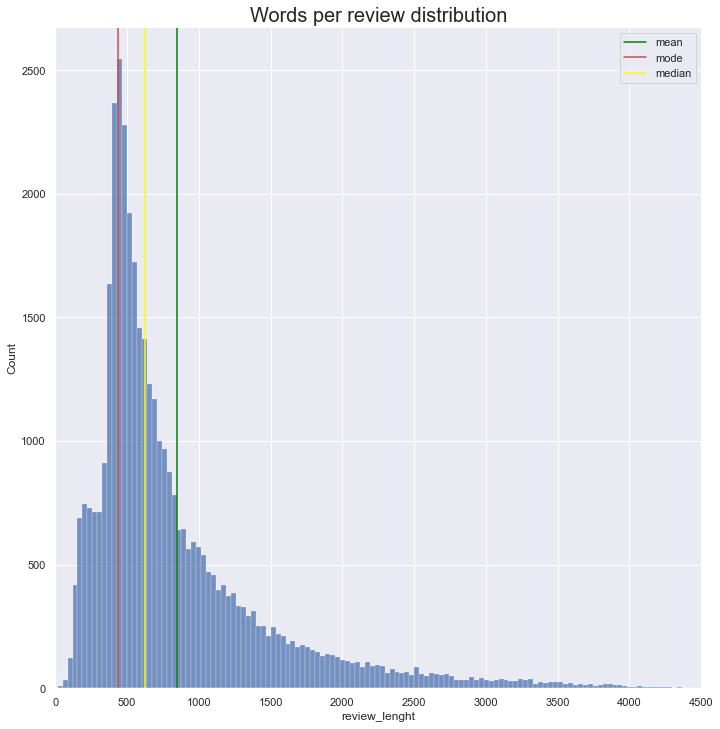

In [10]:
sns.set(rc={'figure.figsize':(20,30)})
sns.displot(train_data['review_lenght'], height=10, aspect=1)
plt.xlim(0, 4500)
plt.axvline(mean, color = 'green', label="mean")
plt.axvline(mode, color = 'r', label="mode")
plt.axvline(median, color = 'yellow', label="median")
plt.title('Words per review distribution', fontsize=20)
plt.legend();

In [11]:
def tfidf_features(X_train, X_val, X_test):
    """
        X_train, X_val, X_test — samples        
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with a proper parameters choice
    # Fit the vectorizer on the train set
    # Transform the train, test, and val sets and return the result
    tfidf_vectorizer = TfidfVectorizer(token_pattern='(\S+)', min_df=5, max_df=0.9, ngram_range=(1,2))
    tfidf_vectorizer.fit(X_train)
    X_train = tfidf_vectorizer.transform(X_train)
    X_val = tfidf_vectorizer.transform(X_val)
    X_test = tfidf_vectorizer.transform(X_test)
    return X_train, X_val, X_test, tfidf_vectorizer.vocabulary_

In [12]:
train, test = train_test_split(train_data, test_size=0.15)
X_train = train.review
X_val = test.review
X_test = test_data['review']
y_train = train.sentiment.to_numpy()
y_val = test.sentiment.to_numpy()

In [13]:
X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_val, X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

# Naive Bayes classifier

In [14]:
nbc = naive_bayes.MultinomialNB()
nbc.fit(X_train_tfidf,y_train)
# predict the labels on validation dataset
predictions_NB = nbc.predict(X_val_tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_val)*100)

Naive Bayes Accuracy Score ->  87.99259009767599


# Logistic Regression

In [17]:
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf,y_train)
predictions_log_reg = log_reg.predict(X_val_tfidf)
# Use accuracy_score function to get the accuracy
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_log_reg, y_val)*100)

Logistic Regression Accuracy Score ->  89.47457056247895
